In [1]:
## GridSearchCV ,RandomizedSearchCV

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris=load_iris()
dataset=pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
dataset['Target']=iris.target

In [5]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X=iris.data
y=iris.target

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [8]:
model=RandomForestClassifier()
params={
    'n_estimators':[10,50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [9]:
grid=GridSearchCV(estimator=model,n_jobs=-1,param_grid=params,cv=5,verbose=1,scoring='accuracy')

In [10]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [11]:
grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [12]:
grid.best_score_

0.9666666666666666

In [13]:
rscv=RandomizedSearchCV(model,params,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)

In [14]:
rscv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy', verbose=1)

In [15]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': None}

In [16]:
rscv.best_score_

0.9583333333333334

1.0


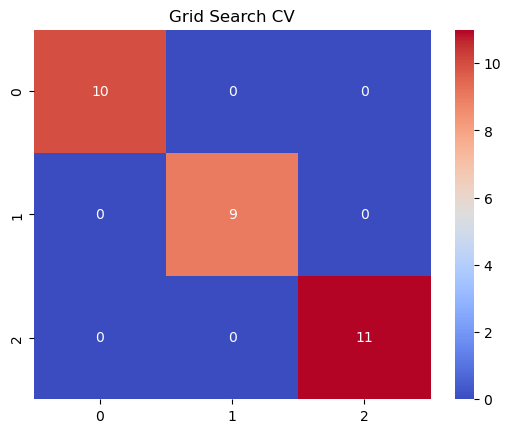

In [17]:
y_pred_grid=grid.predict(X_test)
print(accuracy_score(y_pred_grid,y_test))
sns.heatmap(confusion_matrix(y_test,y_pred_grid),annot=True,cmap='coolwarm')
plt.title('Grid Search CV')
plt.show()

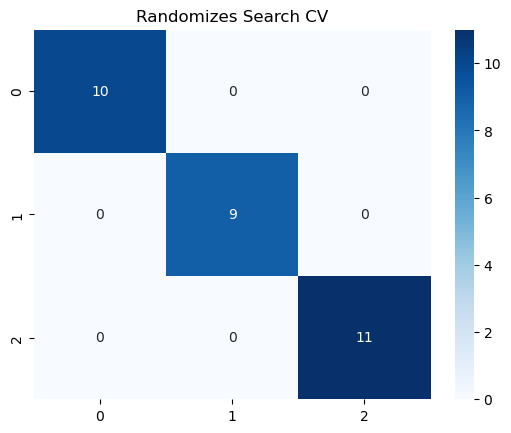

In [18]:
y_pred_rscv=rscv.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred_rscv),annot=True,cmap='Blues')
plt.title('Randomizes Search CV')
plt.show()